In [1]:
import matplotlib.pyplot as plt

In [4]:
from common_functions import *

In [5]:
X, y, Xv, yv = load_mini_speech_commands()
def slog(x):
    return np.log(1+np.abs(x))*np.sign(x)
def ulog(x):
    return np.log(1+np.abs(x))
# X = ulog(X)
# Xv = ulog(Xv)

Found 8000 files belonging to 8 classes.
Using 6400 files for training.
Using 1600 files for validation.


In [6]:
model = models.Sequential([
    layers.Input(shape=(128,128,1)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 128)               31490176  
                                                                 
 dense_1 (Dense)             (None, 8)                 1032      
                                                        

In [7]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

2022-12-05 08:25:23.091284: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8700
2022-12-05 08:25:23.564424: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-05 08:25:24.049057: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7f6fa1969380 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2022-12-05 08:25:24.049079: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2022-12-05 08:25:24.054031: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2022-12-05 08:25:24.129717: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-12-05 08:25:24.175906: I tensorflow/compiler/jit/xla_compilati

50/50 [==============================] - 0s 6ms/step - loss: 2.9380 - accuracy: 0.7237


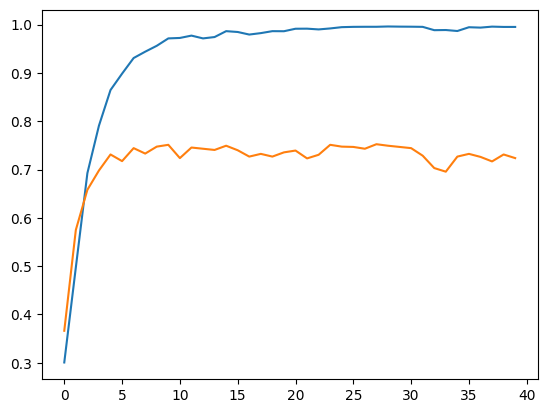

In [8]:
train_acc = [];
test_acc = [];
for i_iter in range(40):
    train_history = model.fit(x=X, y=y, epochs=1, batch_size=128);
    _, test_acc_i = model.evaluate(x=Xv, y=yv)
    train_acc.append(train_history.history['accuracy'][0])
    test_acc.append(test_acc_i)
train_acc = np.vstack(train_acc)
test_acc = np.vstack(test_acc)
plt.plot(train_acc)
plt.plot(test_acc)